<a href="https://colab.research.google.com/github/LinarKulinar/Data-Analysis-Tools-SSAU/blob/main/Lab_2_Visual_6133_Akhmetov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2
Визуализация данных

Выполнил: 6133, Ахметов Линар Габдуллаевич

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 0. Загрузка датасета

Используемый набор данных `young-people-survey` доступен на [Kaggle](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey) и склонирован на [мой Github](https://github.com/LinarKulinar/Data-Analysis-Tools-SSAU/tree/main/data)

In [2]:
# Загрузим с Githib датасет
url_columns = 'https://raw.githubusercontent.com/LinarKulinar/Data-Analysis-Tools-SSAU/main/data/columns.csv'
url_responses = 'https://raw.githubusercontent.com/LinarKulinar/Data-Analysis-Tools-SSAU/main/data/responses.csv'

*Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Описываю ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.*

In [3]:
df_columns = pd.read_csv(url_columns)
df_responses = pd.read_csv(url_responses)

Датасет состоит из 150 столбцов (из них 139 - целочисленных и 11 - категориальных)

Одна строка - ответ на опрос одного изх студентов факультета статистики FSEV UK (граждане Словакии от 15 до 30 лет).

Данные содержат пропуски

Все столбцы можно разделить на следующие группы:

- Музыкальные предпочтения (19 столбцов)
- Предпотения в фильмах (12 пунктов)
- Хобби и интересы (32 шт.)
- Фобии (10 шт.)
- Здоровые привычки (3 предмета)
- Черты характера, взгляды на жизнь и мнения (57 пунктов)
- Привычки (7 пунктов)
- Демографические особенности (10 элементов)

Расшифровку всех признаков можно найти на [странице датасета на kaggle](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey) в абзаце "Questionnaire"

Названия столбцов сокращены, маппинг формулировки вопроса и сокращенного названия можно найти в таблице `df_columns`

In [4]:
# Заполнили численные признаки
data = df_responses.fillna(df_responses.mean().round()) 

data.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


*Каждый график необходимо снабдить комментарием*

# 1. Matplotlib

## 1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,  11.,
         14.,  48.,  64.,  95., 110., 109., 118.,  96., 111.,  55.,  78.,
         32.,  34.,  21.,   6.,   3.,   2.]),
 array([ 62.  ,  64.82,  67.64,  70.46,  73.28,  76.1 ,  78.92,  81.74,
         84.56,  87.38,  90.2 ,  93.02,  95.84,  98.66, 101.48, 104.3 ,
        107.12, 109.94, 112.76, 115.58, 118.4 , 121.22, 124.04, 126.86,
        129.68, 132.5 , 135.32, 138.14, 140.96, 143.78, 146.6 , 149.42,
        152.24, 155.06, 157.88, 160.7 , 163.52, 166.34, 169.16, 171.98,
        174.8 , 177.62, 180.44, 183.26, 186.08, 188.9 , 191.72, 194.54,
        197.36, 200.18, 203.  ]),
 <a list of 50 Patch objects>)

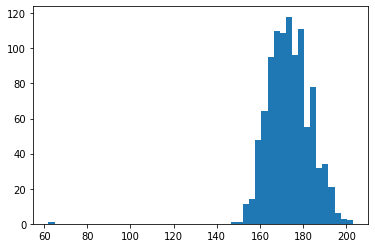

In [5]:
plt.hist(data['Height'], bins=50)

In [6]:
data[data['Height']<80].T.tail(15)

,676
Branded clothing,2.0
Entertainment spending,2.0
Spending on looks,4.0
Spending on gadgets,2
Spending on healthy eating,4.0
Age,20.0
Height,62.0
Weight,55.0
Number of siblings,2.0
Gender,female


Как и было замечено в первой лабораторной, в списке есть девушка с ростом 62 см.

В целом график роста людей напоминает нормальное распределение

In [7]:
 np.unique(data['Education'].dropna())

array(['college/bachelor degree', 'currently a primary school pupil',
       'doctorate degree', 'masters degree', 'primary school',
       'secondary school'], dtype=object)

## 1.2 Построить несколько суб-графиков на одном графике используя .subplot.

*Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом.
Хотя бы в одном графике подпишите оси.
Во всех графиках подписать название графика.*

Построим графики довольства студентов своей жизнью в срезе по их образованию:

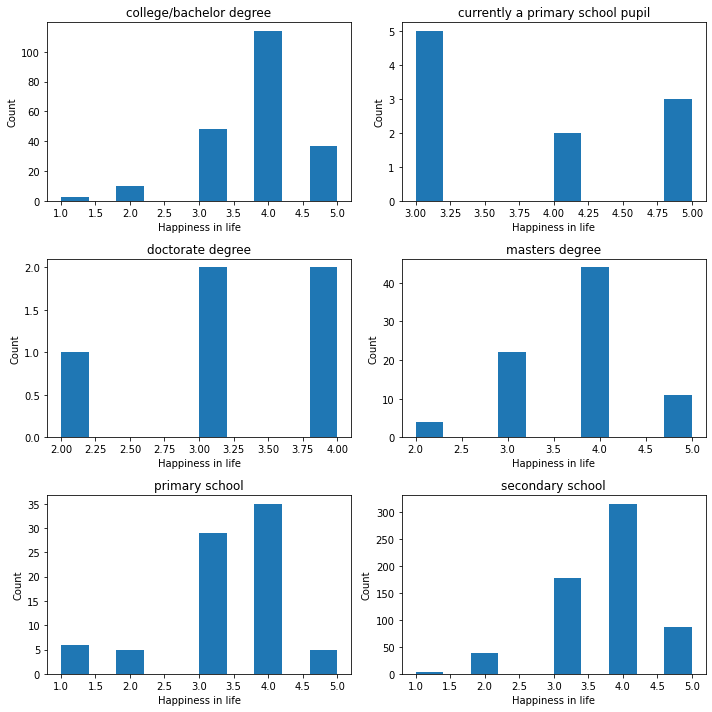

In [8]:
plt.figure(figsize=(10, 10))
for index, value in enumerate(np.unique(data['Education'].dropna().values)):
    plt.subplot(3, 2, index + 1)
    plt.hist(data[data['Education'] == value]['Happiness in life'].values)
    plt.title(value)
    plt.xlabel("Happiness in life")
    plt.ylabel("Count")
plt.tight_layout()

# 2.  На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) 

Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой).

Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

In [9]:
type(data[data['Education'] == 'masters degree'])

pandas.core.frame.DataFrame

In [10]:
type(data[data['Education'] == 'masters degree']['Height'])

pandas.core.series.Series

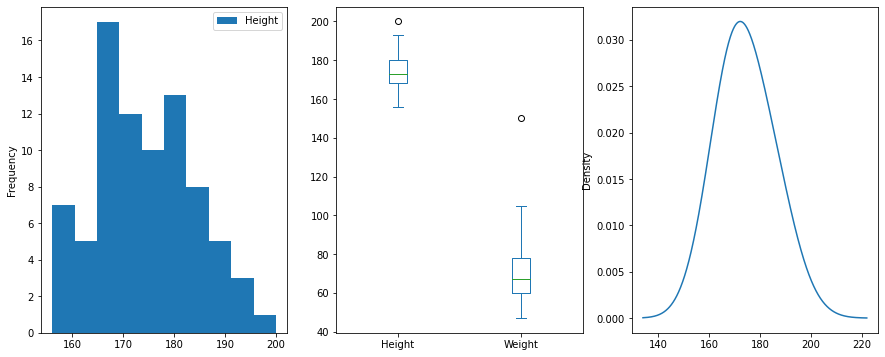

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Вызываем pandas.plot() у объекта DataFrame
data[data['Education'] == 'masters degree'].plot(y='Height', kind='hist', ax=ax1)
# Вызываем pandas.plot() у объекта Series
data[data['Education'] == 'masters degree'][['Height', 'Weight']].plot(kind='box', ax=ax2)
data[data['Education'] == 'masters degree']['Height'].plot.kde(bw_method=0.8, ax=ax3)

# 3. Seaborn

## 3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

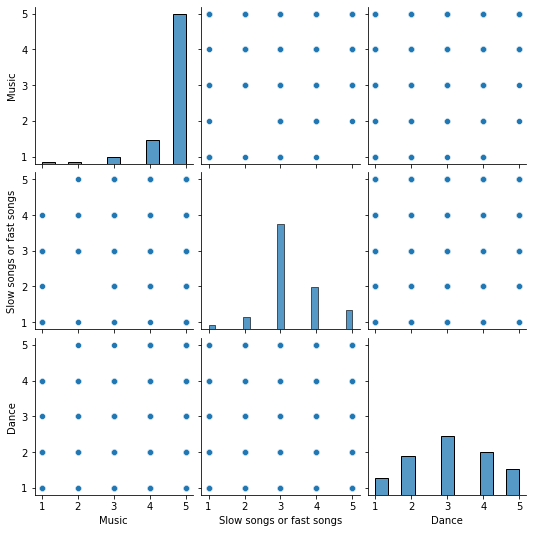

In [24]:
# Подадим для pairplot столбцы, значения которых строго состоят из чисел [1,2,3,4,5]
sns.pairplot(data.iloc[:,:3])

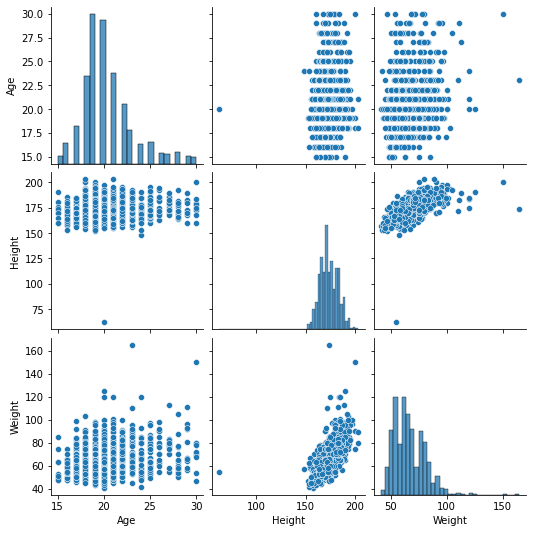

In [23]:
# Укажем в качестве столбцов величины, значения которых отличаются от чисел [1,2,3,4,5]
sns.pairplot(data[['Age','Height', 'Weight']]) 

## 3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

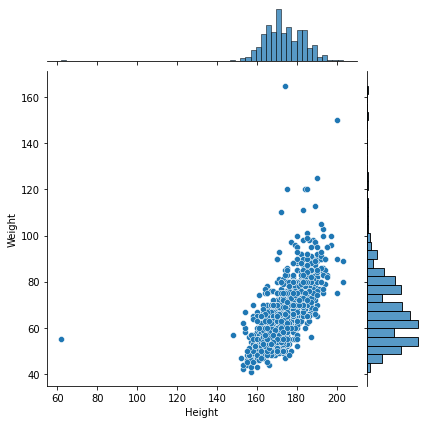

In [25]:
sns.jointplot(x='Height', y='Weight', data=data)

## 3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

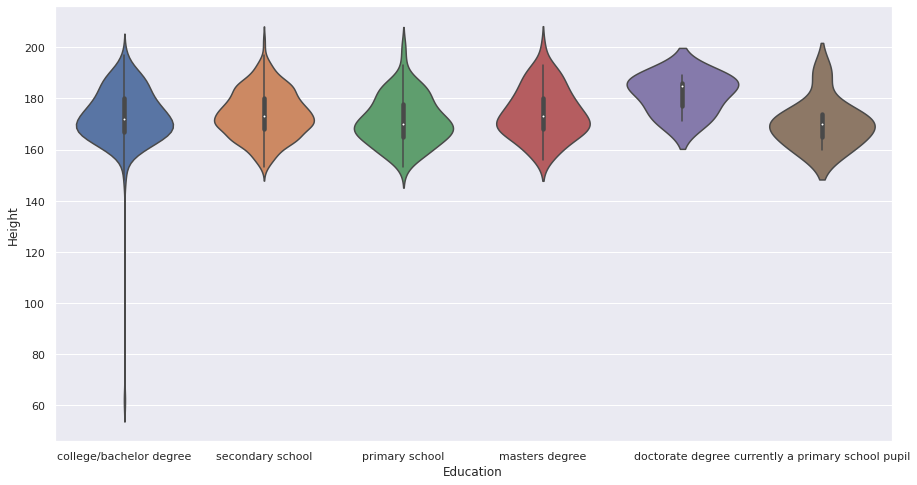

In [42]:
sns.set(rc={"figure.figsize":(15, 8)})
sns.violinplot(x='Education', y='Height', data=data.dropna(), size=20)

## 3.4 Построить график heatmap попарной корреляции всех числовых признаков
(категориальные признаки убрираю)

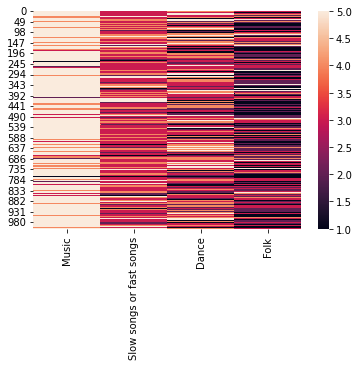

In [36]:
sns.heatmap(data.iloc[:,:4])

                               Music  Slow songs or fast songs     Dance  \
Music                       1.000000                  0.099509  0.081192   
Slow songs or fast songs    0.099509                  1.000000  0.194095   
Dance                       0.081192                  0.194095  1.000000   
Folk                        0.029623                 -0.061802  0.065153   
Country                    -0.008145                 -0.071619  0.058482   
...                              ...                       ...       ...   
Spending on healthy eating  0.070793                 -0.029208  0.025105   
Age                        -0.075645                  0.014109  0.031566   
Height                     -0.068595                  0.085645 -0.002112   
Weight                     -0.130198                  0.117677  0.011747   
Number of siblings         -0.010453                  0.004721  0.003569   

                                Folk   Country  Classical music   Musical  \
Music     

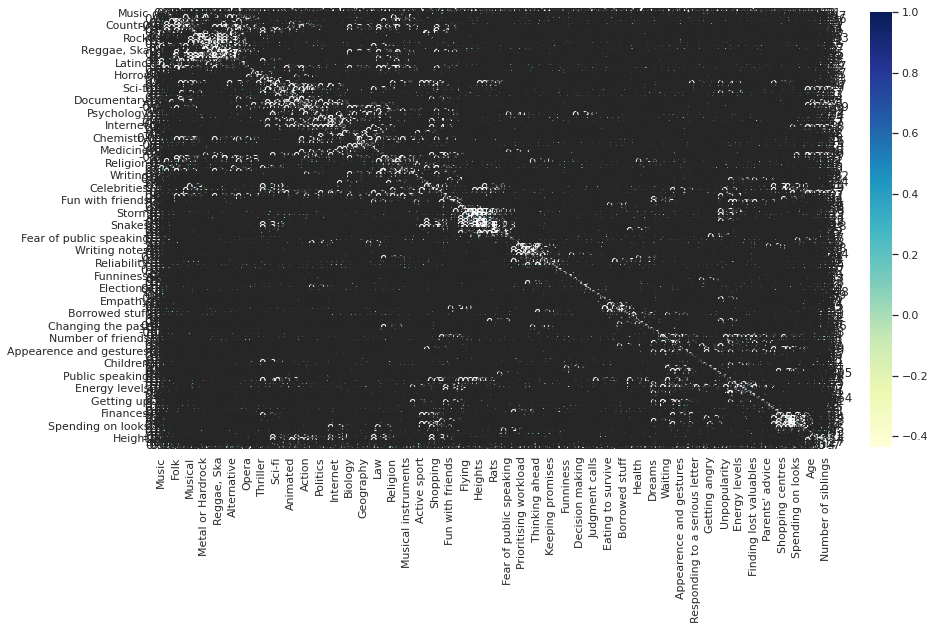

In [43]:
# print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

По корреляционной тепловой карте выше видно, что полнолноценно проанализировать корреляции всех 139 признаков не получится. Отрисуем корреляционную тепловую карту для выбранных признаков.

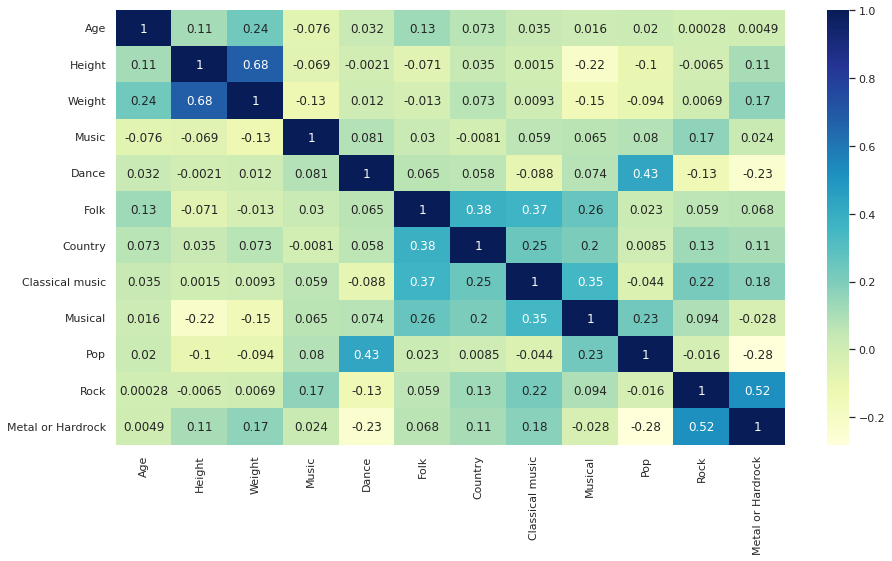

In [50]:
data_number = data[['Age','Height', 'Weight', 'Music', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock']]

# print(data_number.corr())

sns.heatmap(data_number.corr(), cmap="YlGnBu", annot=True)


Те, кто чаще слушают Pop музыку в среднем любят танцевать

Те, кто слушает Folk, также предпочитают кантри и классическую музыку.

Те, кто слушает Metal or Hardrock также предпочитают простой Rock.

Мне показалось забавным, что есть небольшая положительная корреляция между весом человека и его музыкальных предпочтениях к Metal or Hardrock

4 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

5 Построить любой график (связанный с вашими данными) с помощью plotly